In [37]:
import numpy as np
import h5py # for reading in .h5 dust files
import matplotlib.pyplot as plt
import matplotlib

In [2]:
dust_directory = '/data4/msekatchev/leike2020/'

%ls $dust_directory

histogram.h5  mean_std.h5  power.h5  readme.txt  samples.h5


In [39]:
#%less $dust_directory/readme.txt

In [13]:
f = h5py.File(dust_directory + filename, "r")
# https://stackoverflow.com/questions/28170623/how-to-read-hdf5-files-in-python
dust_key = list(f.keys())[0]
dust = f[dust_key][()]
f.close()

In [74]:
dust_s1 = dust[0]

np.max(dust_s1[:,:,270])

0.28081882

In [56]:
x,y = np.arange(-370,370,1),np.arange(-370,370,1)
z = np.arange(-270,269)

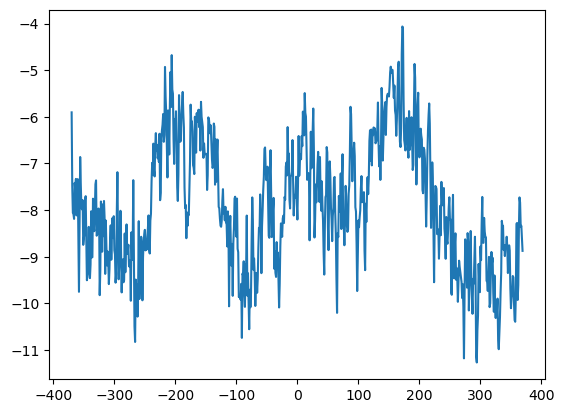

In [80]:
plt.plot(x,np.log(dust_s1[:,370,270]))

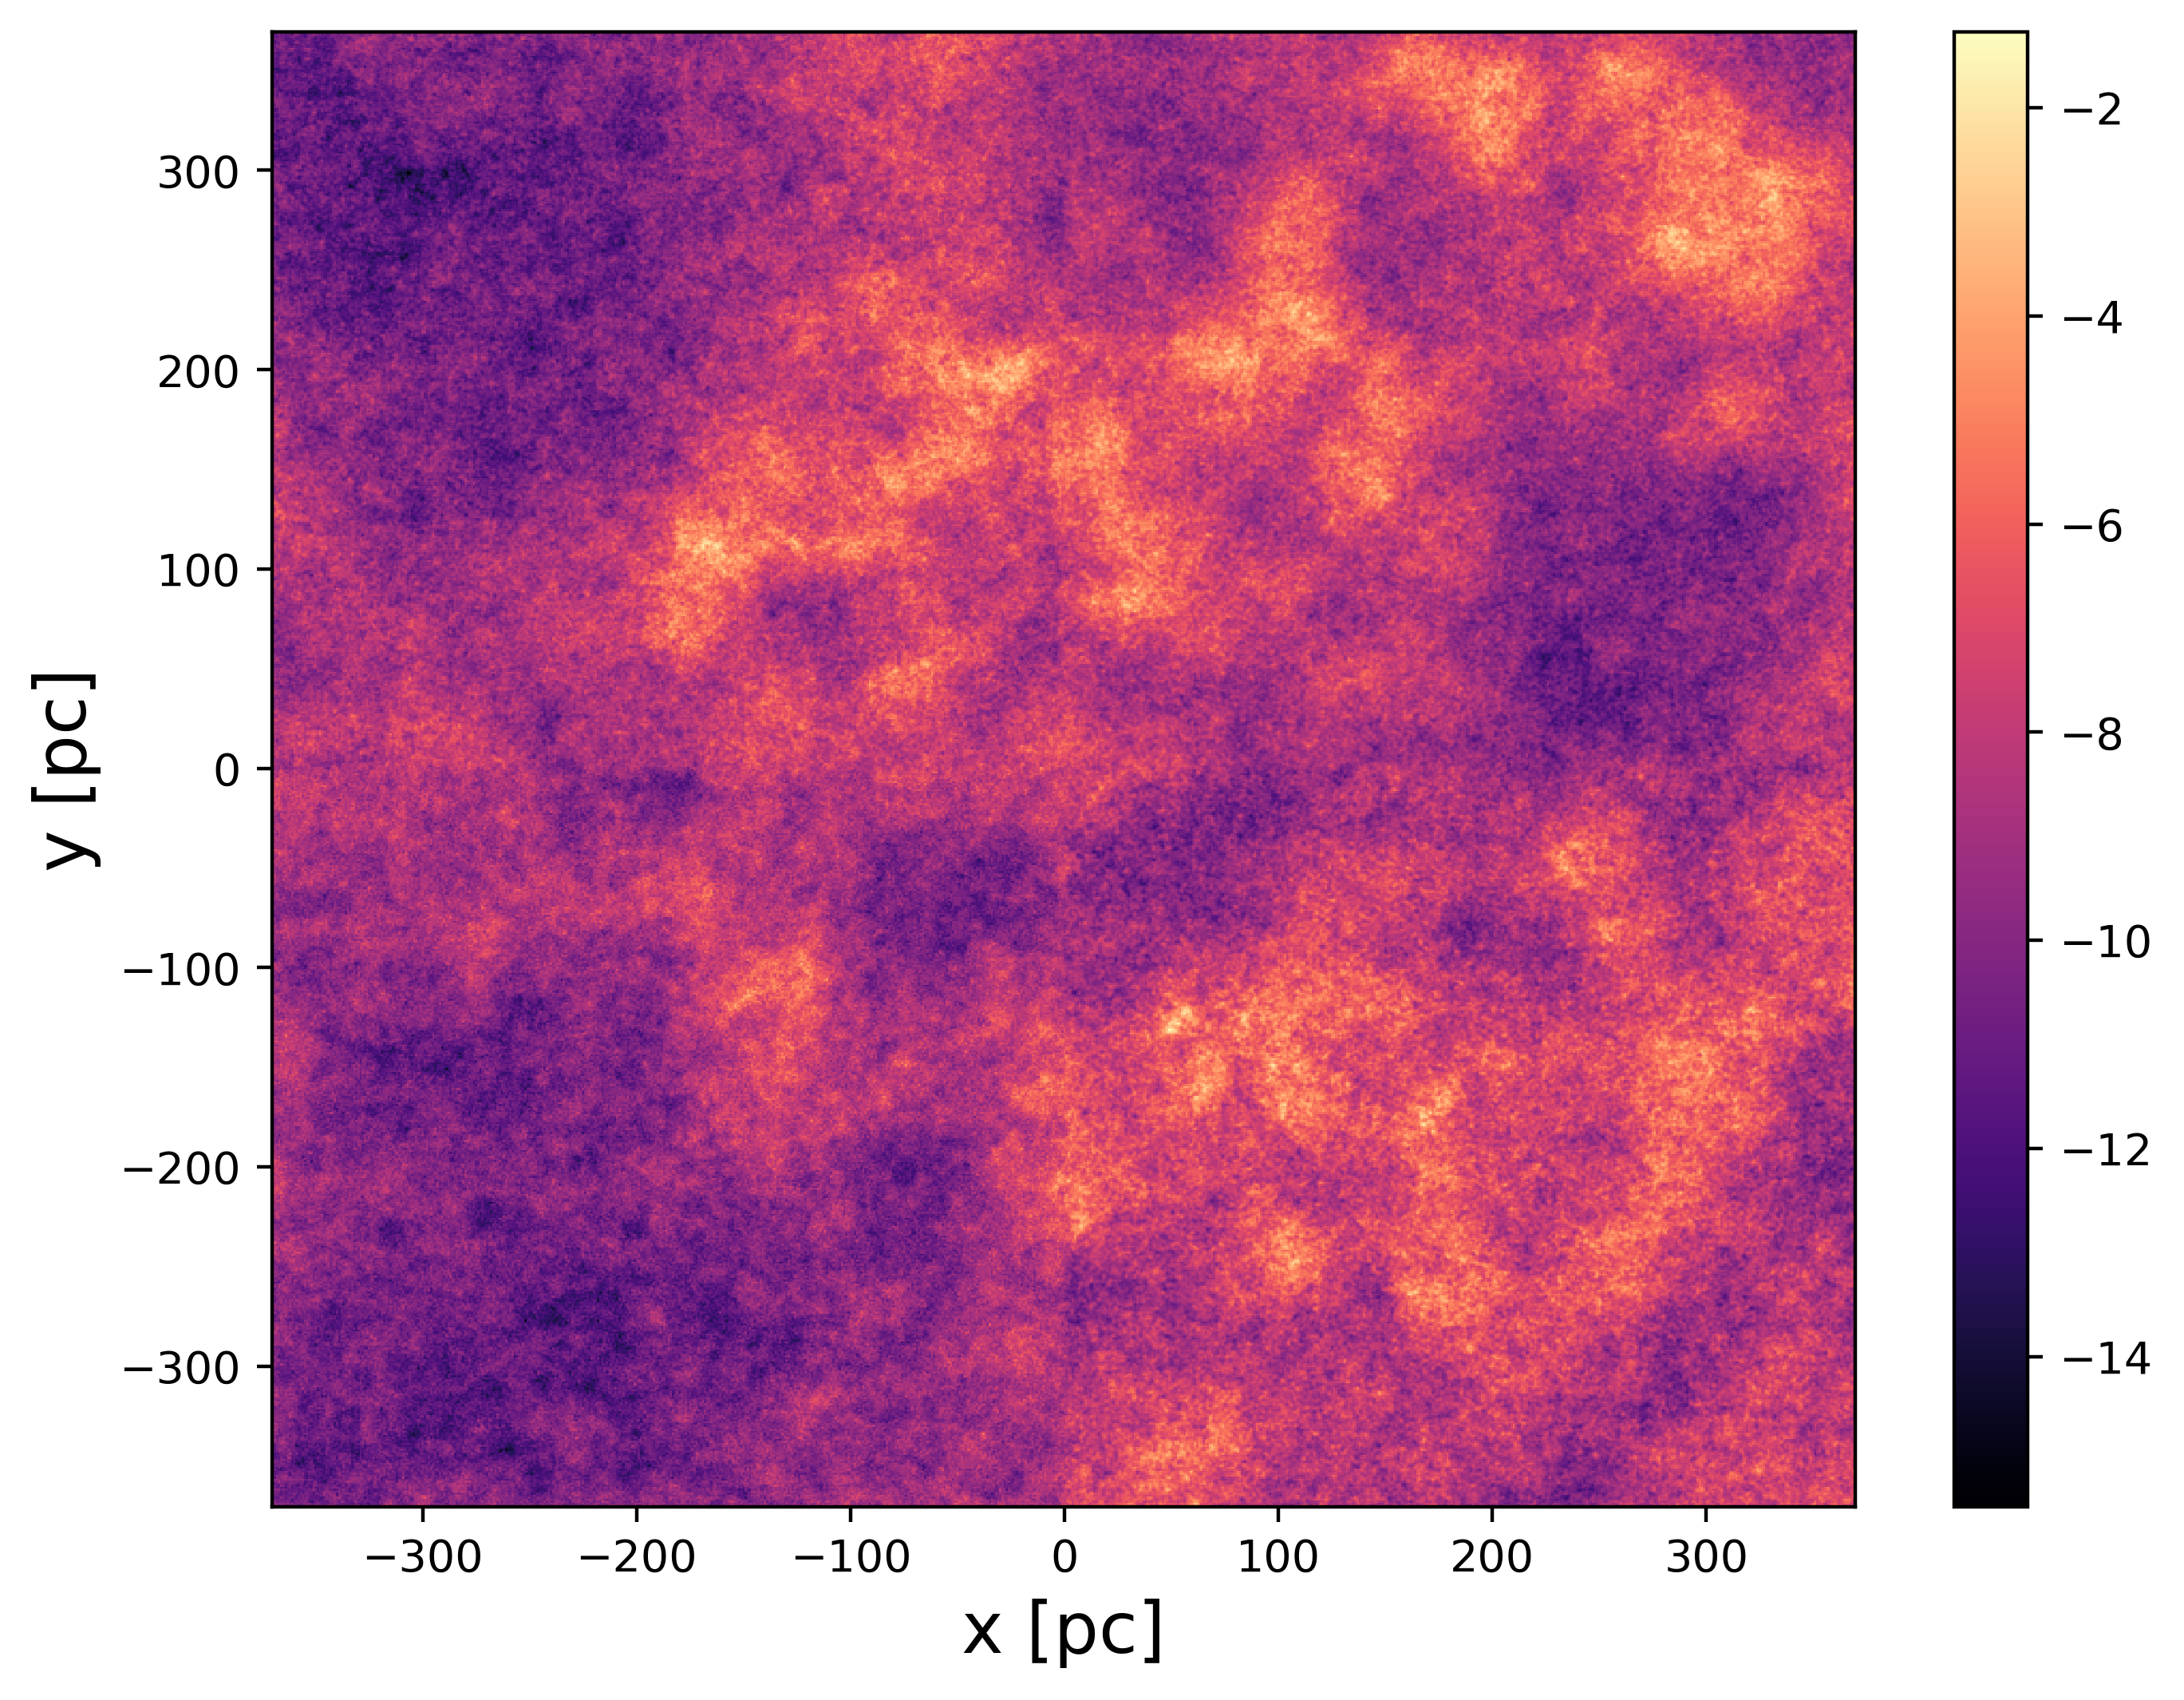

In [85]:
dust_z0 = dust_s1[:,:,270] # select 2D slice of dust cube @ z=0
plt.figure(figsize=(8, 6), dpi=400)


norm_dust = matplotlib.colors.Normalize(vmin=1e-5, vmax=1e-1) # matplotlib.colors.LogNorm()
plt.xlabel("x [pc]", size=16)
plt.ylabel("y [pc]", size=16)
# axs[1,0].set_xlabel("x [kpc]", size=16)
# axs[1,0].set_ylabel("y [kpc]", size=16)
dust_plot = plt.pcolormesh(x,y,np.log(dust_s1[:,:,270]), cmap=plt.cm.magma)
plt.colorbar(dust_plot, norm=norm_dust, orientation = 'vertical')

plt.savefig("dust_z0_slice.png")

In [ ]:
SIZE = 100
RESOLUTION = 1
z = np.array([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
x = np.arange(-SIZE, SIZE + 1, RESOLUTION)  # len = 11
y = np.arange(-SIZE, SIZE + 1, RESOLUTION)  # len = 7
n = np.zeros([len(x), len(y)])
c = np.meshgrid(x,y)
R = np.sqrt(c[0]**2 + c[1]**2)

n = n_halo(R,np.zeros([len(x),len(y)])).value  #+ n_bulge(R,np.zeros([len(x),len(y)])).value

fig, axs = plt.subplots(nrows=len(z)+1, ncols=2, figsize = (20,10*len(z)), gridspec_kw={'height_ratios': [0.1] + [1]*len(z)}, dpi=100)

# https://stackoverflow.com/questions/50420553/matplotlib-pyplot-pcolormesh-setting-range-of-colors
norm_gas = matplotlib.colors.Normalize(vmin=0,  vmax= 1400000)
norm_gas = matplotlib.colors.Normalize(vmin=0,  vmax= 190000)
norm_dm = matplotlib.colors.Normalize(vmin=0, vmax=10**-17)
norm_gas = matplotlib.colors.LogNorm()
norm_dm=matplotlib.colors.LogNorm()
m = 100000000000000
M = 0
for k in range(len(z)):
    
    gas = axs[k+1,0].pcolormesh(x, y, n_gas(R,np.ones([len(x),len(y)])*z[k]).cgs.value, cmap=plt.cm.magma, norm=norm_gas)
    axs[k+1,0].set_title("z="+str(z[k])+" [kpc]", size=20)
    axs[k+1,0].tick_params(axis='x', labelsize=14)
    axs[k+1,0].tick_params(axis='y', labelsize=14)

    halo = axs[k+1,1].pcolormesh(x, y, n_halo(R,np.ones([len(x),len(y)])*z[k]).cgs.value, cmap=plt.cm.magma, norm=norm_dm)
    
    axs[k+1,1].tick_params(axis='x', labelsize=14)
    axs[k+1,1].tick_params(axis='y', labelsize=14)
    
    m = min(np.min(n_gas(R,np.ones([len(x),len(y)])*z[k]).value), m)
    M = max(np.max(n_gas(R,np.ones([len(x),len(y)])*z[k]).value), M)
    #print("--", np.max(n_bulge(R,np.ones([len(x),len(y)])*z[k]).value), np.max(n_disk(R,np.ones([len(x),len(y)])*z[k]).value), np.max(n_halo(R,np.ones([len(x),len(y)])*z[k]).value))
    
print(m, M)
plt.colorbar(gas, norm=norm_gas, cax=axs[0,0], orientation = 'horizontal')
plt.colorbar(halo, norm=norm_dm, cax=axs[0,1], orientation = 'horizontal')
axs[0,0].set_title("Gas", size=25)
axs[0,0].tick_params(axis='x', labelsize=14)
axs[0,0].xaxis.get_offset_text().set_size(15)

axs[0,1].set_title("Halo", size=25)
axs[0,1].tick_params(axis='x', labelsize=14)
axs[0,1].xaxis.get_offset_text().set_size(15)

axs[0,0].set_xlabel("Number Density [1/cm$^3$]", size=16)
axs[1,0].set_xlabel("x [kpc]", size=16)
axs[1,0].set_ylabel("y [kpc]", size=16)

plt.savefig("output3.png")

plt.show()